In [8]:
import pandas as pd
import numpy as np

### 1-) Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.

In [8]:
data={"İsim": ["Ali","Ayşe","Fatma","Ahmet"],
     "Cinsiyet": ["E","K","K","E"],
     "Eğitim":["Lisans","Lisans","Yüksek Lisans","Doktora"],
     "Maaş": [3500,4000,4500,5500],
     "IQ": [110,110,115,118]}
df=pd.DataFrame(data)
df

,İsim,Cinsiyet,Eğitim,Maaş,IQ
0,Ali,E,Lisans,3500,110
1,Ayşe,K,Lisans,4000,110
2,Fatma,K,Yüksek Lisans,4500,115
3,Ahmet,E,Doktora,5500,118


### 2-) Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım. 

#### Kolonlar : radius_mean, area_mean, compactness_mean

In [11]:
data = pd.read_csv("data.csv", index_col=0)

In [12]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### radius_mean

In [49]:
desc_radius=data.radius_mean.describe()
desc_radius

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [61]:
Q1=desc_radius[4]
Q3=desc_radius[6]
IQR= Q3-Q1
lower_bound=Q1 - 1.5*IQR
upper_bound=Q3 + 1.5*IQR
print("Aralık değerleri:", "(",lower_bound, ",", upper_bound,")" )
outliers= data[(data.radius_mean < lower_bound) | (data.radius_mean > upper_bound )].radius_mean
print("Outliers kalan veri sayısı: ",len(outliers))

Aralık değerleri: ( 5.579999999999999 , 21.9 )
Outliers kalan veri sayısı:  14


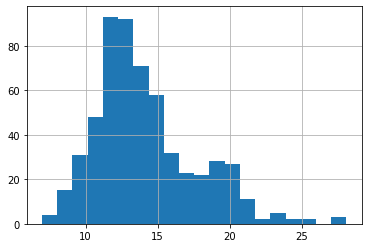

In [36]:
 data["radius_mean"].hist(bins=20);

#### Radius_mean column'a baktığımızda mean ve median değerlerinin birbirine yakın olduğunu görüyoruz bu durumda normal dağılıma yakınsadığını ön görebiliriz, outlier değerleri IQR yöntemi ile bulunabilir.

### area_mean

In [51]:
desc_area=data.area_mean.describe()
desc_area

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

In [62]:
Q1=desc_area[4]
Q3=desc_area[6]
IQR= Q3-Q1
lower_bound=Q1 - 1.5*IQR
upper_bound=Q3 + 1.5*IQR
print("Aralık değerleri:", "(",lower_bound, ",", upper_bound,")" )
outliers= data[(data.area_mean < lower_bound) | (data.area_mean > upper_bound )].area_mean
print("Outliers kalan veri sayısı: ",len(outliers))

Aralık değerleri: ( -123.30000000000001 , 1326.3000000000002 )
Outliers kalan veri sayısı:  25


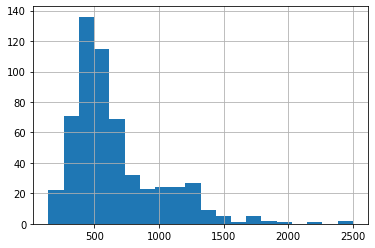

In [53]:
 data["area_mean"].hist(bins=20);

#### Area_mean column'a baktığımızda ise mean ve median değerlerine göre normal dağılımadığını öngörüyoruz, IQR yöntemi ile hesapladığımız outlier değerlerinin bazıları veri setine dahil olması gereken değerlerdir.

### compactness_mean


In [64]:
desc_compactness=data.compactness_mean.describe()
desc_compactness

count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness_mean, dtype: float64

In [65]:
Q1=desc_compactness[4]
Q3=desc_compactness[6]
IQR= Q3-Q1
lower_bound=Q1 - 1.5*IQR
upper_bound=Q3 + 1.5*IQR
print("Aralık değerleri:", "(",lower_bound, ",", upper_bound,")" )
outliers= data[(data.compactness_mean < lower_bound) | (data.compactness_mean > upper_bound )].compactness_mean
print("Outliers kalan veri sayısı: ",len(outliers))

Aralık değerleri: ( -0.03329999999999997 , 0.22861999999999996 )
Outliers kalan veri sayısı:  16


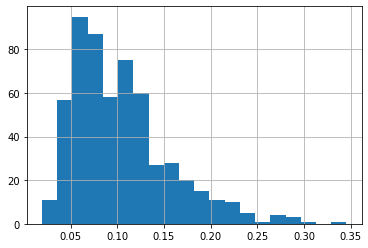

In [38]:
 data["compactness_mean"].hist(bins=20);

#### Compactness_mean column'a baktığımızda mean ve median değerlerine göre normal dağılıma yakınsadığını ön görebiliriz, ancak  IQR yöntemi ile bulduğumuz  lower bound değeri nedeniyle outlier olduğu halde veri setine dahil edilen değerler vardır.

### 3-) Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.

### Korelasyon

In [89]:
corr = np.round(data.corr(),2)

In [97]:
# area_mean ile radius_mean korelasyonu
corr[["area_mean"]][0:1]

,area_mean
radius_mean,0.99


#### area_mean ile radius_mean arasında çok kuvvetli pozitif doğrusal ilişki var

In [99]:
# area_mean ile compactness_mean korelasyonu
corr[["area_mean"]][5:6]

,area_mean
compactness_mean,0.5


#### area_mean ile compactness_mean arasında orta kuvvetli pozitif doğrusal ilişki var

In [102]:
# compactness_mean ile radius_mean korelasyonu
corr[["compactness_mean"]][0:1]

,compactness_mean
radius_mean,0.51


#### compactness_mean ile radius_mean arasında orta kuvvetli pozitif doğrusal ilişki var

### Kovaryans

In [113]:
df = data.loc[:,["radius_mean", "area_mean", "compactness_mean"]]
df.cov()

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


In [ ]:
#area_mean ile radius_mean arasında aynı yönde ilişki var (biri artarken diğeride artıyor)
#area_mean ile compactness_mean arasında aynı yönde ilişki var 
#compactness_mean ile radius_mean arasında aynı yönde ilişki var 

### Pearson Correlation Coefficient

In [122]:
from scipy.stats import pearsonr

In [131]:
list1 = data['radius_mean']
list2 = data['area_mean']
list3 = data['compactness_mean']

In [128]:
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation:', corr)

Pearsons correlation: 0.9873571700566124


In [132]:
corr, _ = pearsonr(list1, list3)
print('Pearsons correlation:', corr)

Pearsons correlation: 0.5061235775263635


In [133]:
corr, _ = pearsonr(list2, list3)
print('Pearsons correlation:', corr)

Pearsons correlation: 0.49850168215241175


In [ ]:
#area_mean ile radius_mean arasında yüksek korelasyonlu pozitif ilişki var (biri artarken diğeride artıyor)
#area_mean ile compactness_mean arasında pozitif ilişki var 
#compactness_mean ile radius_mean arasında pozitif ilişki var

### Spearman Rank Coefficient


In [134]:
from scipy.stats import spearmanr

In [135]:
print("Spearman Rank correlation coefficient", spearmanr(data['radius_mean'], data['area_mean'])[0])
print("p-value of Spearman Rank correlation coefficient", spearmanr(data['radius_mean'], data['area_mean'])[1]) 

Spearman Rank correlation coefficient 0.9996020278067481
p-value of Spearman Rank correlation coefficient 0.0


In [136]:
print("Spearman Rank correlation coefficient", spearmanr(data['radius_mean'], data['compactness_mean'])[0])
print("p-value of Spearman Rank correlation coefficient", spearmanr(data['radius_mean'], data['compactness_mean'])[1]) 

Spearman Rank correlation coefficient 0.49757760995795647
p-value of Spearman Rank correlation coefficient 6.334924144221496e-37


In [137]:
print("Spearman Rank correlation coefficient", spearmanr(data['compactness_mean'], data['area_mean'])[0])
print("p-value of Spearman Rank correlation coefficient", spearmanr(data['compactness_mean'], data['area_mean'])[1]) 

Spearman Rank correlation coefficient 0.4889883974982949
p-value of Spearman Rank correlation coefficient 1.5419515156000542e-35


In [ ]:
##area_mean ile radius_mean arasında yüksek pozitif ilişki var 
#compactness_mean ile radius_mean değerlerinin p-value değeri 0,05'ten küçük olmadığı için korelasyon istatistiksel olarak anlamlı değildir.
#area_mean ile compactness_mean değerlerinin p-value değeri 0,05'ten küçük olmadığı için korelasyon istatistiksel olarak anlamlı değildir.

### Effect size

In [17]:
import statistics

In [22]:
def effsize(x,y):
    mean=x.mean() - y.mean()
    len1=len(x)
    len2=len(y)
    len_=len1+len2-2
    s=np.sqrt((((len1-1)*(np.std(x, ddof=1) ** 2))+((len2-1)*(statistics.stdev(y))))/len_)
    d=mean/s
    return d

In [25]:
print("area_mean, radius_mean effect size:", effsize(data["area_mean"],data["radius_mean"]))
print("area_mean, compactness_mean effect size:", effsize(data["area_mean"],data["compactness_mean"]))
print("compactness_mean, radius_mean effect size:", effsize(data["compactness_mean"],data["radius_mean"]))

area_mean, radius_mean effect size: 2.5749496168517854
area_mean, compactness_mean effect size: 2.631338777337225
compactness_mean, radius_mean effect size: -10.559944852910421


### 4-) Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.

##### Bir araştırmaya göre her 63 çocuktan 1 tanesi, yetişkinlikte ortaya çıkan belli bir hastalığa yakalanmakta ve tam güvenilir olmamasına rağmen yapılan test sonuçlarına göre, hastalıklı bir çocuğun testi %80 pozitif, sağlıklı bir çocuğun testi ise%10 pozitif sonuç vermektedir. Bu bilgilere göre test sonucu pozitif olan bir çocuğun gerçekten hasta olma olasılığı nedir?
###### P(A) : Çocuğun hasta olması olasılığı = 1/63
###### P(B) : Testin pozitif çıkması olasılığı = 1/63 * 0.80 + 64/63 * 0.10 = 7/63
###### P(B|A) : Hastalıklı çocuğun testinin pozitif çıkma olasılığı = 0.80
###### P(A|B) : Pozitif çıkan testin hastalık çıkma olasılığı ( sorulan bu )
###### P(A|B)=P(B|A)*P(A)/P(B) => (0.80 * 1/63) / (7/63) = 0.11 = %11 bulunur.

#### Ali kaşındığını söylüyor. Kedi alerjisi için bir test var, ancak bu test her zaman doğru değil: Gerçekten alerjisi olan insanlar için, testin “Evet” sonucu vermesi %80 oranında. Alerjisi olmayan insanlar için, testin “Evet” sonucu vermesi %10 oranında (“false positive “). Nüfusun %1’inde alerji varsa ve test “Evet” çıkıyorsa, Ali’nin gerçekten alerji olma olasılığı nedir?
##### A: Alerji, B: Testin Evet çıkması
##### P(A) : Alerji olasılığı = 0.01
##### P(B) : Testin evet çıkma olasılığı =0.01*0.80 + 0.99*0.10=0.107
##### P(B|A) : Alerji olması durumunda testin evet çıkma olasılığı = 0.80
##### P(A|B) : Testin evet çıkması durumunda alerji olasılığı = ( sorulan )
##### P(A|B) = 0.01/0.80/0.107=0.075= %7

#### Bir danışmanlık şirketin üyeleri, 1. işletmeden %60 , 2. işletmeden %30 ve 3.işletmeden %10 oranında olmak üzere üç işletmeden araba kiralamaktadırlar. 1işletmeden gelen araçların %9’u, 2. işetmeden gelen araçların %20’si ve 3.işletmeden gelen araçların %6’sı bakım gerektiriyorsa,
#### a) Şirkete kiralanan bir aracın bakım gerektirme olasılığı nedir?
#### b) Bakım gerektiren aracın 2. işletmeden gelmiş olma olasılığı nedir?

B: Bir arabanın bakım gerektirmesi,
Ai: Arabanın 1, 2 ya da 3. işletmeden gelme i= 1, 2, 3 olayları olsun. 
P(A1)=0.60
P(A2)=0.30
P(A3)=0.10
P(B|A1)=0.09 , P(B|A2)=0.20 , P(B|A3)=0.06

a) P(B)→arabanın bakım gerektirme olasılığı soruluyor. Toplam olasılıktan
yararlanılarak bulunur.
P(B) = (P(B|A1)*P(A1) + P(B|A2)*P(A2) + P(B|A3)*P(A3))
(0.60)*(0.09)+(0.30)*(0.20)+(0.10)*(0.06)=0.12
Bu şirkette kiralanan araçların %12’sini bakım gerektirecektir. 
        
b) Danışmanlık şirketinin kiraladığı araba bakım gerektiriyorsa bu arabanın 2.
işletmeden gelmiş olma olasılığı Bayes teoreminden yararlanılarak bulunabilir. 

P(A|B)= P(B|A2)*P(A2)/ (P(B|A1)*P(A1) + P(B|A2)*P(A2) + P(B|A3)*P(A3))= 0.30*0.20/0.12=0.50
danışmanlık şirketinin kiraladığı arabalardan yalnızca%30’nun 2. işletmeden gelmesine
karşın, bakım gerektiren arabaların yarısı (%50 si) 2. işletmeden gelmektedir. 

#### Üç torbada beyaz (B) ve kırmızı (K) toplar bulunmaktadır. I. Torbada; 1beyaz, 3 kırmızı top, II. Torbada; 2 beyaz, 2 kırmızı, III. Torbada; 3 beyaz, 1 kırımızı topvardır. Rasgele seçilen bir torbadan çekilen top beyaz ise bu topun I. Torbadan çekilmişolması olasılığı nedir?
B: Çekilen topun beyaz olması
Ai: Seçilen torbanın I., II, veya III. Torba olması olayları olsun. İ=1, 2, 3 

P(A1)=P(A2)=P(A3)=1/3
P(A|B)= P(B|A1)P(A1)/ (P(B|A1)P(A1) + P(B|A2)P(A2) + P(B|A3)P(A3))= %17 
Çekilen beyaz topun, I. Torbadan gelmesi olasılığı %17’dir. 

### 5-) Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.

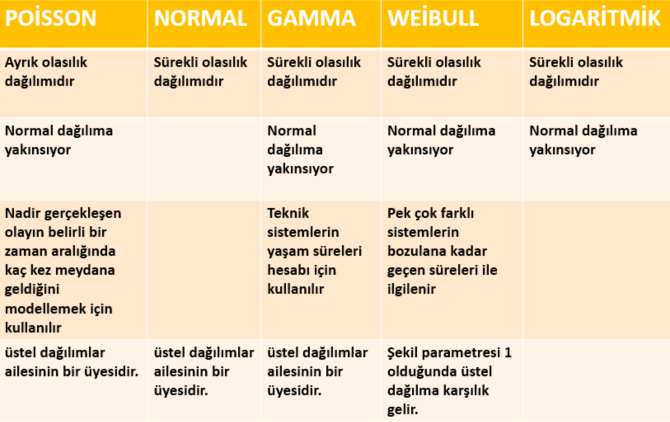